Getting Data from API


API has a limit of 1000 rows so using the offset to retrieve 1000 rows at a time

In [253]:
!pip install requests pandas

In [254]:
import requests
import pandas as pd
import time
from io import StringIO  # Import StringIO from io
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:

# Base URL for the API
base_url = "https://data.austintexas.gov/resource/9t4d-g238.csv"

# Parameters for pagination
limit = 1000
offset = 0
all_data = []

# Function to get data with offset
def get_data(offset):
    params = {
        "$limit": limit,
        "$offset": offset
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        print(f"Data retrieved with offset: {offset}")
        # Use StringIO from io module
        return pd.read_csv(StringIO(response.text))
    else:
        print(f"Failed to retrieve data for offset: {offset}")
        return pd.DataFrame()

# Loop through the dataset using pagination
while True:
    # Get data for the current offset
    df = get_data(offset)

    # Break if no more data is returned
    if df.empty:
        print("No more data to retrieve.")
        break

    # Append the data to the list
    all_data.append(df)

    # Increment the offset for the next request
    offset += limit

    # Sleep to avoid hitting the API rate limit
    time.sleep(1)

# Combine all pages into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Display the combined DataFrame
print(f"\nFinal DataFrame Shape: {final_df.shape}")
print(final_df.head())

Data retrieved with offset: 0
Data retrieved with offset: 1000
Data retrieved with offset: 2000
Data retrieved with offset: 3000
Data retrieved with offset: 4000
Data retrieved with offset: 5000
Data retrieved with offset: 6000
Data retrieved with offset: 7000
Data retrieved with offset: 8000
Data retrieved with offset: 9000
Data retrieved with offset: 10000
Data retrieved with offset: 11000
Data retrieved with offset: 12000
Data retrieved with offset: 13000
Data retrieved with offset: 14000
Data retrieved with offset: 15000
Data retrieved with offset: 16000
Data retrieved with offset: 17000
Data retrieved with offset: 18000
Data retrieved with offset: 19000
Data retrieved with offset: 20000
Data retrieved with offset: 21000
Data retrieved with offset: 22000
Data retrieved with offset: 23000
Data retrieved with offset: 24000
Data retrieved with offset: 25000
Data retrieved with offset: 26000
Data retrieved with offset: 27000
Data retrieved with offset: 28000
Data retrieved with offset:

# **Data Dictionary for Austin Animal Center Outcomes Dataset**

| Column Name         | Description                                                  | API Field Name      | Data Type           |
|---------------------|--------------------------------------------------------------|---------------------|---------------------|
| **Animal ID**       | Unique identifier for each animal                            | `animal_id`         | Text                |
| **Name**            | Name of the animal (if available)                             | `name`              | Text                |
| **DateTime**        | Date and time of the outcome event                            | `datetime`          | Floating Timestamp  |
| **MonthYear**       | Month and year of the outcome event                           | `monthyear`         | Floating Timestamp  |
| **Date of Birth**   | Date of birth of the animal                                   | `date_of_birth`     | Floating Timestamp  |
| **Outcome Type**    | General category of outcome (e.g., Adoption, Transfer, Euthanasia) | `outcome_type` | Text                |
| **Outcome Subtype** | Specific subtype of outcome (e.g., Offsite, Foster)            | `outcome_subtype`   | Text                |
| **Animal Type**     | Type of animal (e.g., Dog, Cat)                               | `animal_type`       | Text                |
| **Sex upon Outcome**| Sex and reproductive status upon outcome (e.g., Neutered Male) | `sex_upon_outcome`  | Text                |
| **Age upon Outcome**| Age of the animal at the time of outcome                      | `age_upon_outcome`  | Text                |
| **Breed**           | Breed of the animal                                            | `breed`             | Text                |
| **Color**           | Color description of the animal                               | `color`             | Text                |


Quick Look at the data structure


In [256]:
final_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A882831,*Hamilton,2023-07-01T18:12:00.000,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,2019-05-08T18:20:00.000,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,2018-07-18T16:02:00.000,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,2020-08-16T11:38:00.000,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,2016-02-13T17:59:00.000,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [257]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171786 entries, 0 to 171785
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   animal_id         171786 non-null  object
 1   name              122630 non-null  object
 2   datetime          171786 non-null  object
 3   monthyear         171786 non-null  object
 4   date_of_birth     171786 non-null  object
 5   outcome_type      171744 non-null  object
 6   outcome_subtype   78702 non-null   object
 7   animal_type       171786 non-null  object
 8   sex_upon_outcome  171784 non-null  object
 9   age_upon_outcome  171781 non-null  object
 10  breed             171786 non-null  object
 11  color             171786 non-null  object
dtypes: object(12)
memory usage: 15.7+ MB


In [258]:
final_df.describe()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
count,171786,122630,171786,171786,171786,171744,78702,171786,171784,171781,171786,171786
unique,154432,29543,143544,143544,8605,11,26,5,5,55,2988,659
top,A721033,Luna,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,2016-05-01T00:00:00.000,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,748,39,39,121,83510,39990,93552,60239,28451,34023,17793


## Feature Engineering

In [259]:
final_df["outcome_type"].value_counts()

,count
outcome_type,
Adoption,83510
Transfer,48192
Return to Owner,25508
Euthanasia,10661
Died,1653
Rto-Adopt,1226
Disposal,867
Missing,92
Relocate,28


Too many different outcomes so lets group them into Positive Negative and Neutral

In [260]:
# Grouping Outcome Types
def group_outcome(outcome):
    if outcome in ['Adoption', 'Return to Owner', 'Rto-Adopt']:
        return 'Positive'
    elif outcome in ['Transfer', 'Relocate']:
        return 'Neutral'
    elif outcome in ['Euthanasia', 'Died', 'Disposal', 'Lost', 'Missing', 'Stolen']:
        return 'Negative'
    else:
        return 'Other'

# Apply Grouping
final_df['outcome_group'] = final_df['outcome_type'].apply(group_outcome)


In [261]:
final_df['outcome_group'].value_counts()

,count
outcome_group,
Positive,110244
Neutral,48220
Negative,13280
Other,42


Dropping the others

In [262]:
final_df = final_df[final_df['outcome_group'] != 'Other']


In [263]:
final_df['age_upon_outcome'].value_counts()

,count
age_upon_outcome,
1 year,28441
2 years,27520
2 months,23032
3 years,9689
3 months,9114
1 month,7316
4 months,5995
4 years,5742
5 years,5204


Standardizing the Age

In [264]:
import numpy as np
import re

def convert_age_to_days(age_str):
    """
    Convert age_upon_outcome to days
    """
    # Handle negative values
    if pd.isna(age_str) or '-' in age_str:
        return np.nan

    # Extract numerical value and unit
    match = re.match(r"(\d+)\s(\w+)", age_str)
    if match:
        value, unit = int(match.group(1)), match.group(2).lower()

        # Convert to days based on unit
        if 'year' in unit:
            return value * 365
        elif 'month' in unit:
            return value * 30
        elif 'week' in unit:
            return value * 7
        elif 'day' in unit:
            return value
    return np.nan


In [265]:
# Apply Conversion
final_df['age_days'] = final_df['age_upon_outcome'].apply(convert_age_to_days)

# Display Distribution of Age in Days
print(final_df['age_days'].describe())

# Check for Negative and NaN values
print("Negative or NaN Age Days:", final_df[final_df['age_days'] <= 0]['age_days'].count())


count    171730.000000
mean        723.618197
std        1022.798041
min           0.000000
25%          60.000000
50%         365.000000
75%         730.000000
max       10950.000000
Name: age_days, dtype: float64
Negative or NaN Age Days: 267


Dropping rows where age is not valid

In [266]:
# Drop rows where 'age_days' is less than or equal to 0
final_df = final_df[final_df['age_days'] > 0]

# Verify the change
print("Negative or NaN Age Days (after dropping):", final_df[final_df['age_days'] <= 0]['age_days'].count())


Negative or NaN Age Days (after dropping): 0


Categorizing Age into Puppy/Kitten, Junior, Adult, Senior

In [267]:
def categorize_age(days):
    if days < 180:
        return 'Puppy/Kitten'
    elif days < 730:
        return 'Junior'
    elif days < 2555:
        return 'Adult'
    else:
        return 'Senior'

final_df['age_group'] = final_df['age_days'].apply(categorize_age)


<ipython-input-267-a800fb94393c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['age_group'] = final_df['age_days'].apply(categorize_age)


In [268]:
final_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_group,age_days,age_group
0,A882831,*Hamilton,2023-07-01T18:12:00.000,2023-07-01T18:12:00.000,2023-03-25T00:00:00.000,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White,Positive,90.0,Puppy/Kitten
1,A794011,Chunk,2019-05-08T18:20:00.000,2019-05-08T18:20:00.000,2017-05-02T00:00:00.000,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,Positive,730.0,Adult
2,A776359,Gizmo,2018-07-18T16:02:00.000,2018-07-18T16:02:00.000,2017-07-12T00:00:00.000,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,Positive,365.0,Junior
3,A821648,NaN,2020-08-16T11:38:00.000,2020-08-16T11:38:00.000,2019-08-16T00:00:00.000,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray,Negative,365.0,Junior
4,A720371,Moose,2016-02-13T17:59:00.000,2016-02-13T17:59:00.000,2015-10-08T00:00:00.000,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,Positive,120.0,Puppy/Kitten


While we can't use the Name directly, having a name can be beneficial to adoption or positive outcomes so we will make a variable for that

In [269]:
# Text Features from Name
final_df['name_length'] = final_df['name'].fillna('').apply(len)
final_df['has_name'] = final_df['name'].notna().astype(int)

In [270]:
final_df['sex_upon_outcome'].value_counts()

,count
sex_upon_outcome,
Neutered Male,60220
Spayed Female,54655
Intact Male,21970
Intact Female,21529
Unknown,13088


Simplyfying the reproductive status

In [271]:
def simplify_sex(sex):
    if sex in ['Neutered Male', 'Spayed Female']:
        return 'Fixed'
    elif sex in ['Intact Male', 'Intact Female']:
        return 'Intact'
    else:
        return 'Unknown'

# Apply Simplification
final_df['reproductive_status'] = final_df['sex_upon_outcome'].apply(simplify_sex)


In [272]:
# Convert to Binary Column
final_df['is_fixed'] = final_df['reproductive_status'].apply(lambda x: 1 if x == 'Fixed' else 0)


Dropping rows where status is unknown

In [273]:
# Drop rows where 'reproductive_status' is 'Unknown'
final_df = final_df[final_df['reproductive_status'] != 'Unknown']


In [274]:
final_df['breed'].value_counts()

,count
breed,
Domestic Shorthair Mix,31003
Domestic Shorthair,21657
Pit Bull Mix,10053
Labrador Retriever Mix,8621
Chihuahua Shorthair Mix,6842
...,...
Australian Shepherd/English Springer Spaniel,1
Airedale Terrier/Irish Terrier,1
Miniature Poodle/Jack Russell Terrier,1


Too many breed types segregating them by mix or pure

In [275]:
# Identify Mix vs Pure
final_df['breed_type'] = final_df['breed'].apply(lambda x: 'Mix' if 'Mix' in x else 'Pure')


In [276]:
final_df['color'].value_counts()

,count
color,
Black/White,16815
Black,12974
Brown Tabby,9712
White,5769
Brown/White,5408
...,...
Blue Tabby/Tan,1
Fawn/Chocolate,1
Blue Point/Lynx Point,1


Too many colors trying to simplify

In [277]:
def simplify_color(color):
    """
    Simplify the color into broader categories
    """
    color = color.lower()

    # Black Group
    if any(word in color for word in ['black', 'ebony', 'charcoal']):
        return 'Black'

    # White Group
    elif any(word in color for word in ['white', 'cream', 'ivory', 'pearl', 'platinum']):
        return 'White'

    # Brown Group
    elif any(word in color for word in ['brown', 'brindle', 'chocolate', 'mocha', 'mahogany']):
        return 'Brown'

    # Grey Group
    elif any(word in color for word in ['gray', 'grey', 'blue', 'silver', 'slate', 'pewter', 'ash']):
        return 'Grey'

    # Gold Group
    elif any(word in color for word in ['gold', 'tan', 'yellow', 'fawn', 'buff', 'sandy']):
        return 'Gold'

    # Red Group
    elif any(word in color for word in ['red', 'ginger', 'orange', 'copper', 'auburn']):
        return 'Red'

    # Cream Group
    elif any(word in color for word in ['cream', 'beige', 'off-white']):
        return 'Cream'

    # Tabby Pattern
    elif 'tabby' in color:
        return 'Tabby'

    # Merle Pattern
    elif 'merle' in color:
        return 'Merle'

    # Tricolor Pattern
    elif 'tricolor' in color or ('black' in color and 'tan' in color and 'white' in color):
        return 'Tricolor'

    # Spotted or Speckled Patterns
    elif any(word in color for word in ['spotted', 'speckled', 'ticked', 'roan', 'freckled']):
        return 'Spotted'

    # Mixed or Multiple Colors
    elif '/' in color or 'and' in color:
        return 'Multicolor'

    # Default to Other
    else:
        return 'Other'


In [278]:
# Apply Enhanced Color Grouping
final_df['color_group'] = final_df['color'].apply(simplify_color)


In [279]:
final_df['color_group'].value_counts()

,count
color_group,
White,53955
Black,49926
Brown,18316
Other,11157
Grey,8101
Red,6786
Gold,6552
Tricolor,3557
Multicolor,24


Extracting months for seasonility from datetime

In [280]:
# Ensure datetime columns are in the correct format
final_df['datetime'] = pd.to_datetime(final_df['datetime'], errors='coerce')
final_df['monthyear'] = pd.to_datetime(final_df['monthyear'], errors='coerce')

# Extract Year, Month, Day, and Day of Week
final_df['outcome_year'] = final_df['datetime'].dt.year
final_df['outcome_month'] = final_df['datetime'].dt.month
final_df['outcome_day'] = final_df['datetime'].dt.day
final_df['outcome_weekday'] = final_df['datetime'].dt.day_name()

# Extract Season of Outcome
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

final_df['outcome_season'] = final_df['outcome_month'].apply(get_season)


In [281]:
final_df['outcome_season'].value_counts()

,count
outcome_season,
Summer,45032
Fall,41358
Winter,37241
Spring,34743


Dropping all redundant columns now

In [282]:
# Combine all redundant columns to drop
columns_to_drop = [
    'animal_id',        # Unique identifier, not useful for modeling
    'name',             # High cardinality, already encoded as name_length and has_name
    'datetime',         # Extracted into temporal features
    'monthyear',        # Extracted into temporal features
    'date_of_birth',    # Used to calculate age_days and age_group
    'age_upon_outcome', # Transformed into age_days and age_group
    'sex_upon_outcome', # Encoded into is_fixed
    'reproductive_status', # Encoded into is_fixed
    'breed',            # Encoded into breed_type
    'color',            # Encoded into color_group
    'outcome_month',    # Redundant with outcome_season
    'outcome_day',      # Low predictive power and noise
    'outcome_weekday',# Redundant with outcome_season
    'outcome_type',     # Redundant with outcome_group
    'outcome_subtype',   # Redundant with outcome_group
    'name_length'      # Redundant with has_name
    ]

# Drop all columns in one go
final_df.drop(columns=columns_to_drop, inplace=True)


In [283]:

pd.set_option("display.max_columns", None)


In [284]:
final_df.head()

,animal_type,outcome_group,age_days,age_group,has_name,is_fixed,breed_type,color_group,outcome_year,outcome_season
0,Cat,Positive,90.0,Puppy/Kitten,1,1,Mix,Black,2023,Summer
1,Cat,Positive,730.0,Adult,1,1,Mix,White,2019,Spring
2,Dog,Positive,365.0,Junior,1,1,Mix,White,2018,Summer
4,Dog,Positive,120.0,Puppy/Kitten,1,1,Pure,Gold,2016,Winter
5,Cat,Neutral,6.0,Puppy/Kitten,0,0,Mix,Red,2014,Spring


              age_days  has_name  is_fixed  outcome_year
age_days      1.000000  0.197313  0.122905     -0.070675
has_name      0.197313  1.000000  0.320228      0.038318
is_fixed      0.122905  0.320228  1.000000     -0.018932
outcome_year -0.070675  0.038318 -0.018932      1.000000


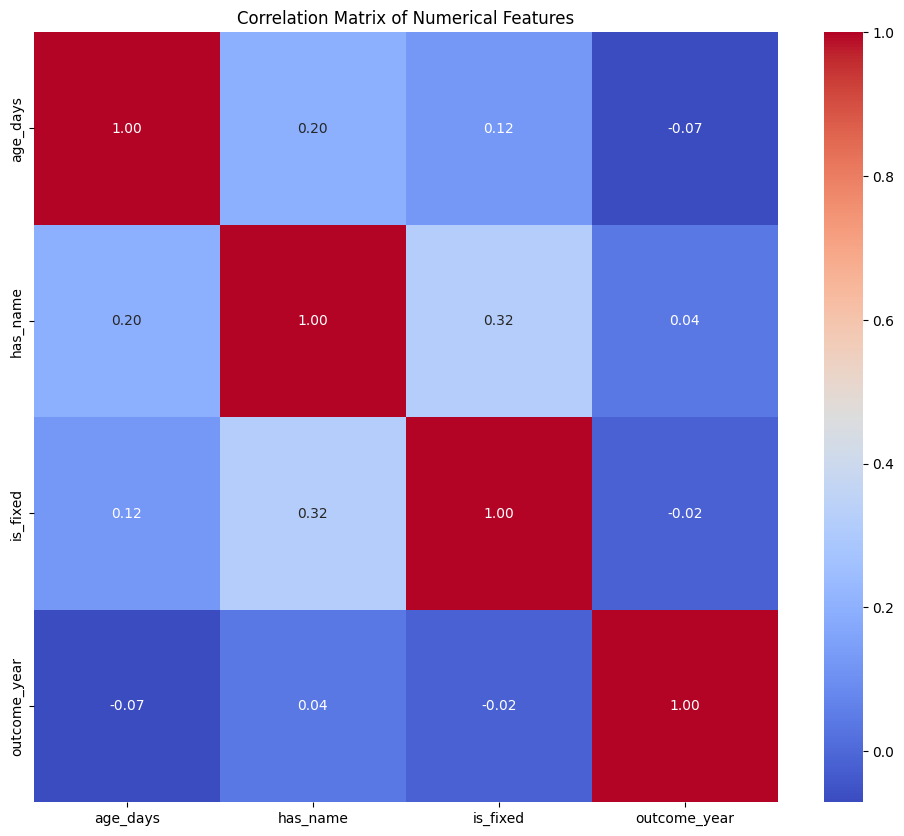

In [285]:
# Select numerical columns for correlation analysis
numerical_cols = final_df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = final_df[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Exploratory Data Analysis

Univariate Analysis

<ipython-input-286-2de11c1cb018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome_group', data=final_df, palette='viridis')


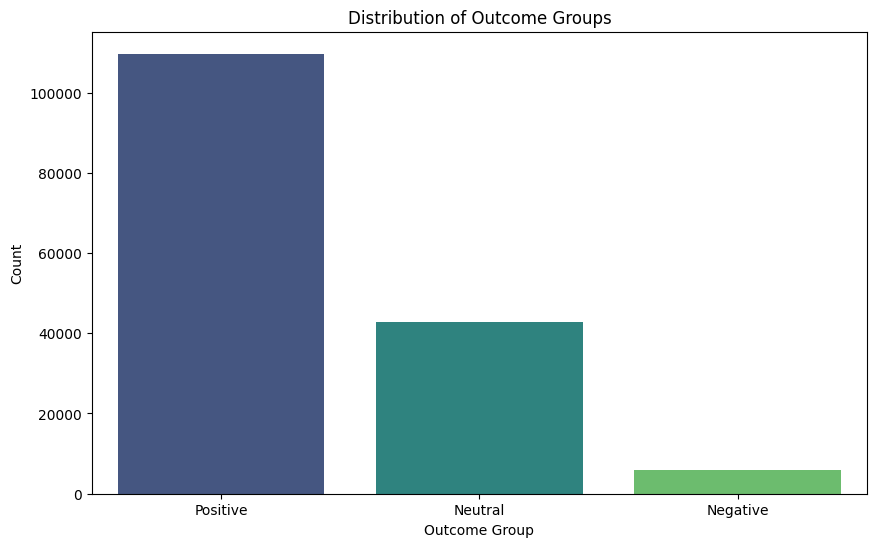

In [286]:
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome_group', data=final_df, palette='viridis')
plt.title('Distribution of Outcome Groups')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.show()


<ipython-input-287-0dd2e966ca48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='animal_type', data=final_df, palette='Set3')


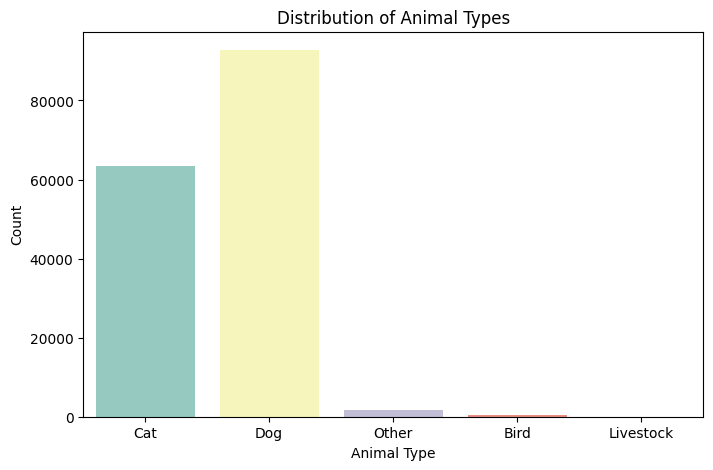

In [287]:
plt.figure(figsize=(8, 5))
sns.countplot(x='animal_type', data=final_df, palette='Set3')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


<ipython-input-288-c7c36085878d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=final_df, palette='Set1')


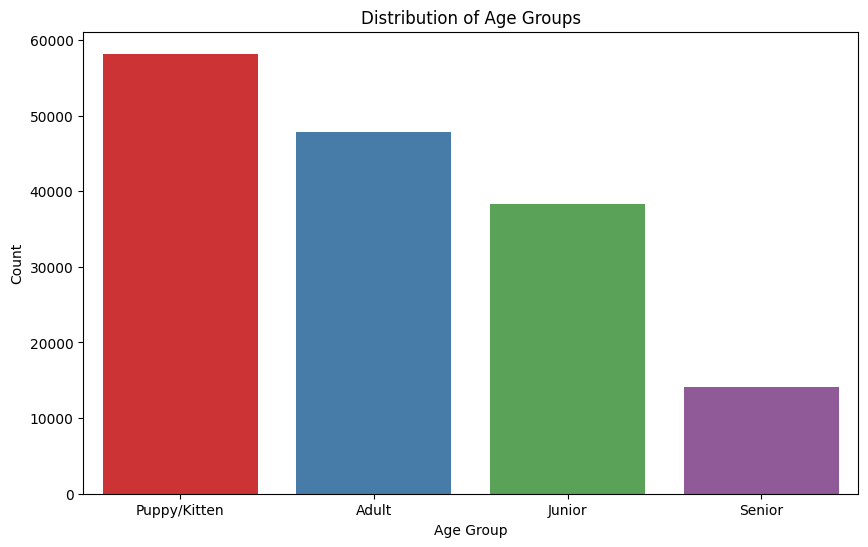

In [288]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=final_df, palette='Set1')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


<ipython-input-289-41b64e2c7366>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='breed_type', data=final_df, palette='Set2')


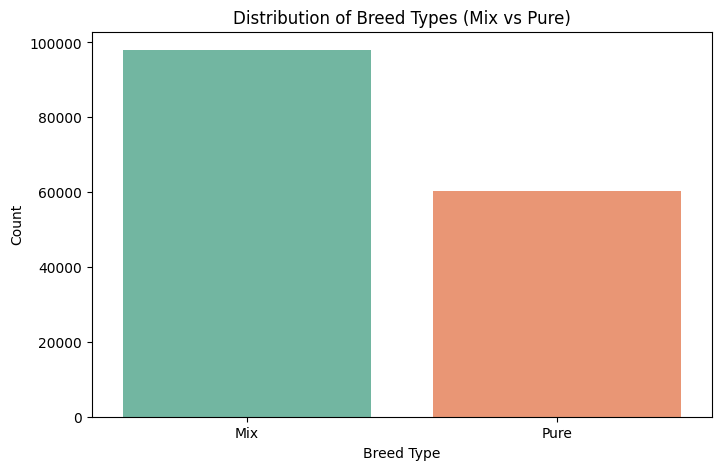

In [289]:
plt.figure(figsize=(8, 5))
sns.countplot(x='breed_type', data=final_df, palette='Set2')
plt.title('Distribution of Breed Types (Mix vs Pure)')
plt.xlabel('Breed Type')
plt.ylabel('Count')
plt.show()


<ipython-input-290-6fa5011d1fee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color_group', data=final_df, palette='Set2')


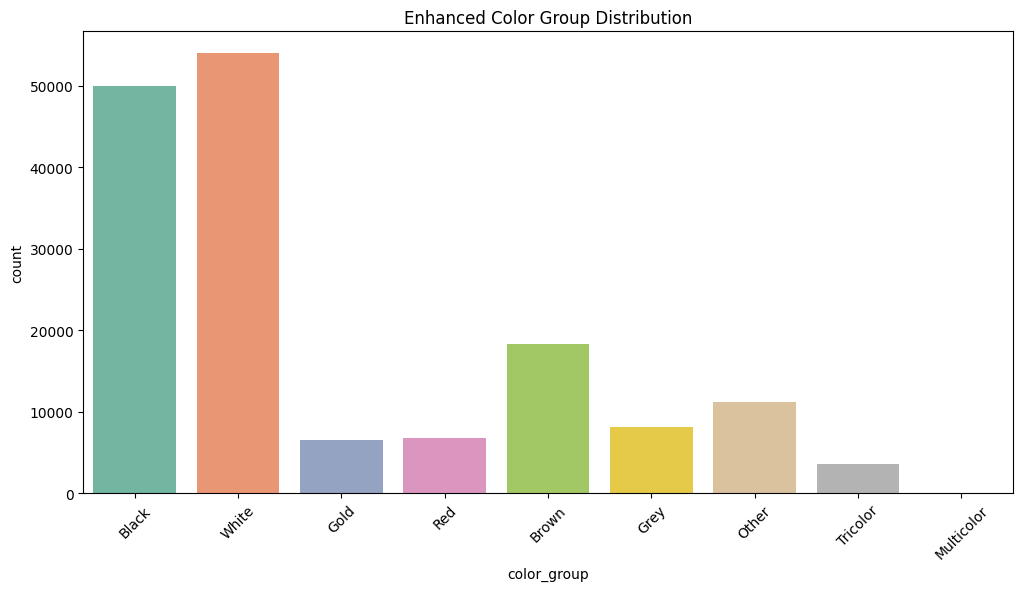

In [290]:
plt.figure(figsize=(12, 6))
sns.countplot(x='color_group', data=final_df, palette='Set2')
plt.title('Enhanced Color Group Distribution')
plt.xticks(rotation=45)
plt.show()


Bivariate Analysis

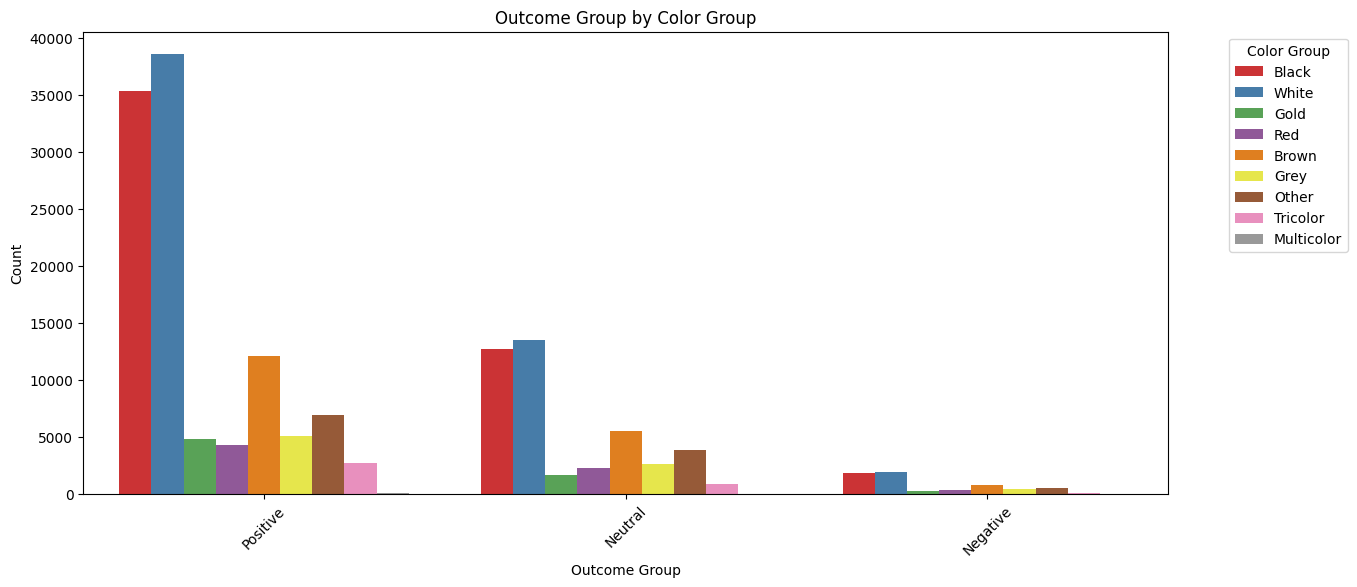

In [291]:
plt.figure(figsize=(14, 6))
sns.countplot(x='outcome_group', hue='color_group', data=final_df, palette='Set1')
plt.title('Outcome Group by Color Group')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.legend(title='Color Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


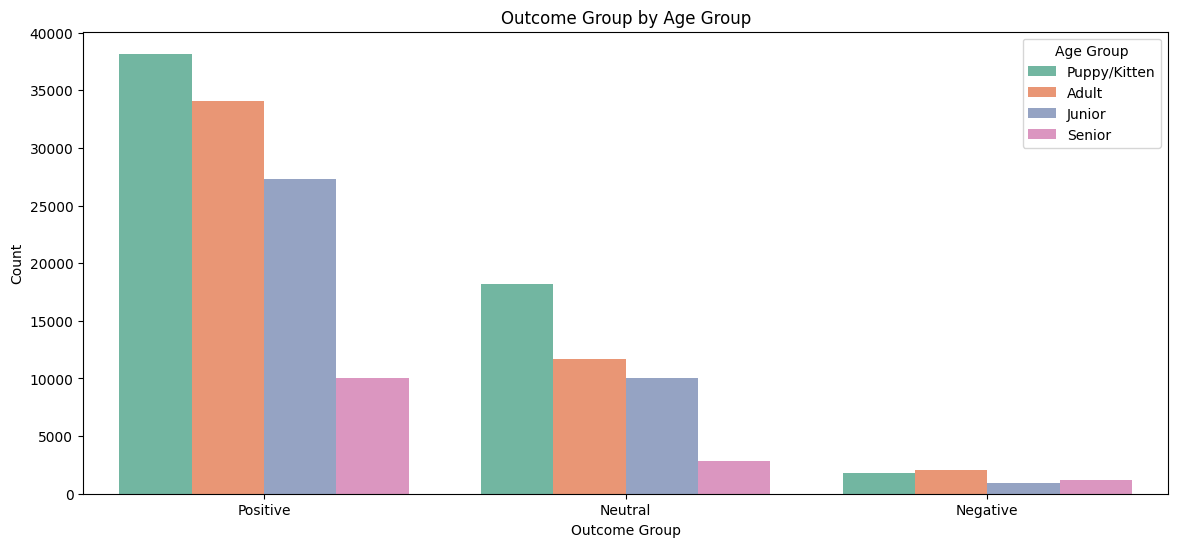

In [292]:
plt.figure(figsize=(14, 6))
sns.countplot(x='outcome_group', hue='age_group', data=final_df, palette='Set2')
plt.title('Outcome Group by Age Group')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()


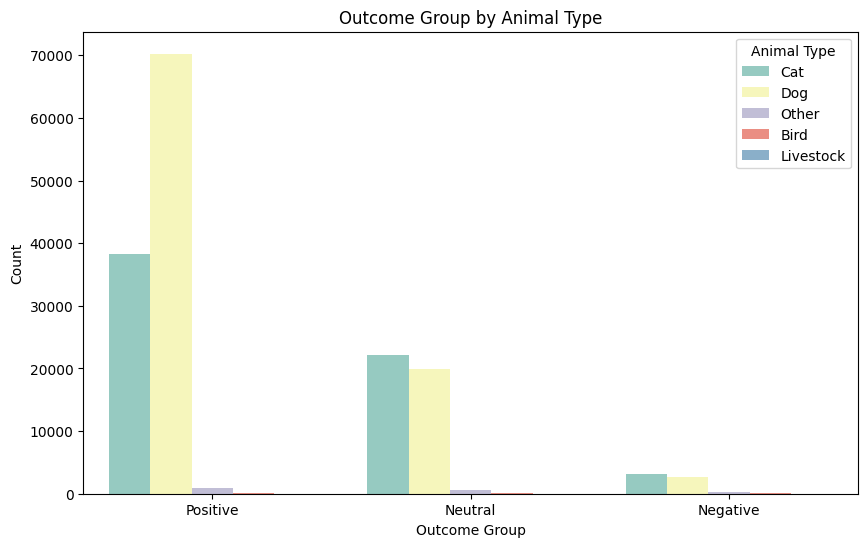

In [293]:
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome_group', hue='animal_type', data=final_df, palette='Set3')
plt.title('Outcome Group by Animal Type')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.legend(title='Animal Type')
plt.show()


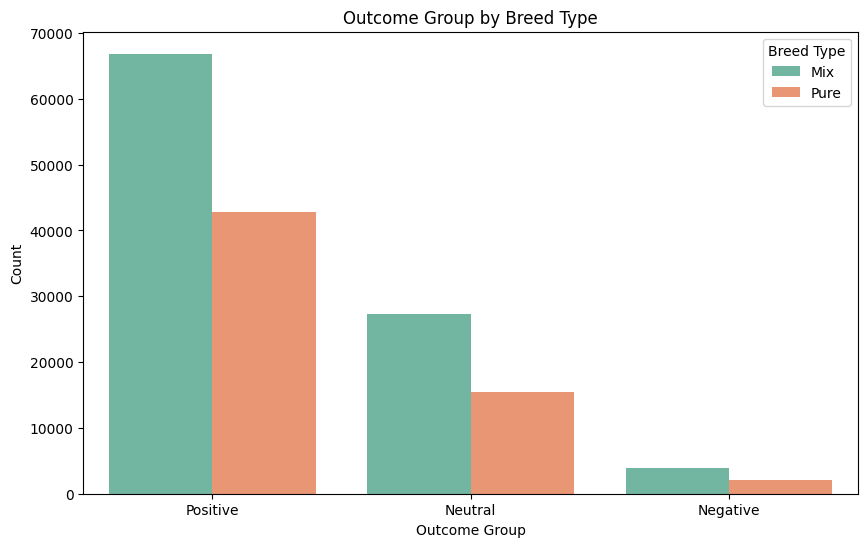

In [294]:
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome_group', hue='breed_type', data=final_df, palette='Set2')
plt.title('Outcome Group by Breed Type')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.legend(title='Breed Type')
plt.show()


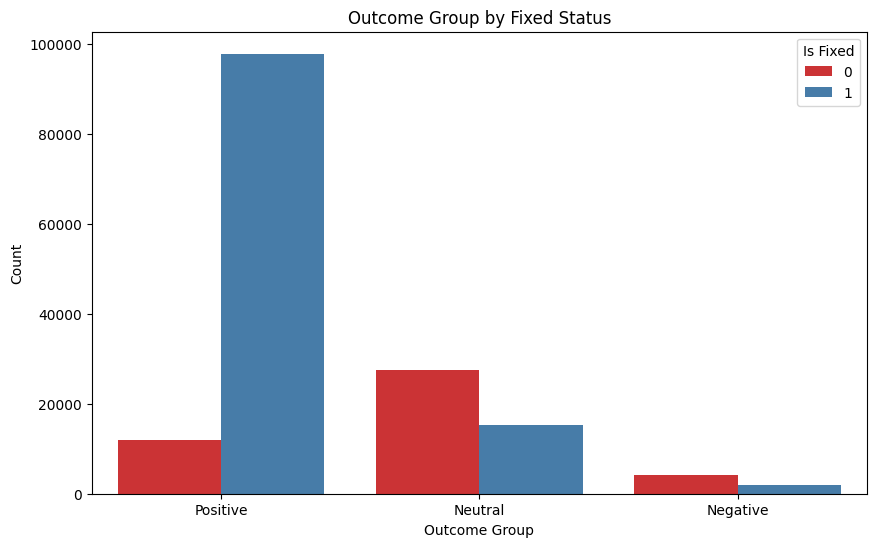

In [295]:
plt.figure(figsize=(10, 6))
sns.countplot(x='outcome_group', hue='is_fixed', data=final_df, palette='Set1')
plt.title('Outcome Group by Fixed Status')
plt.xlabel('Outcome Group')
plt.ylabel('Count')
plt.legend(title='Is Fixed')
plt.show()


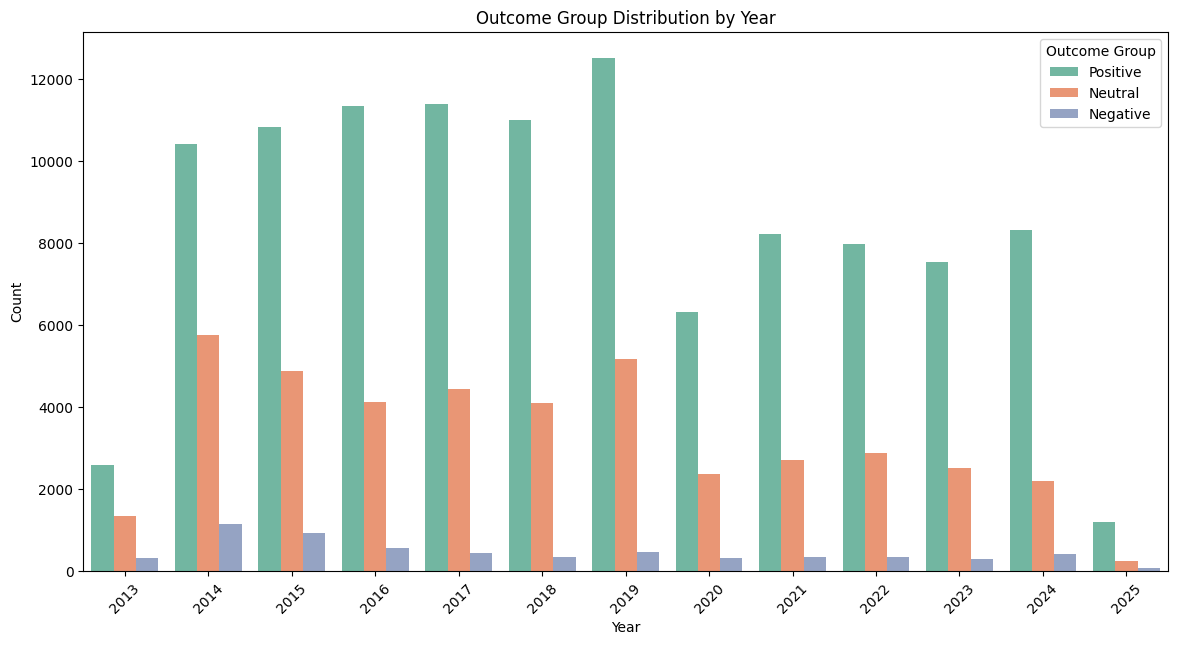

In [296]:
# Plotting Outcome Group by Year
plt.figure(figsize=(14, 7))
sns.countplot(x='outcome_year', hue='outcome_group', data=final_df, palette='Set2')
plt.title('Outcome Group Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Outcome Group')
plt.xticks(rotation=45)
plt.show()


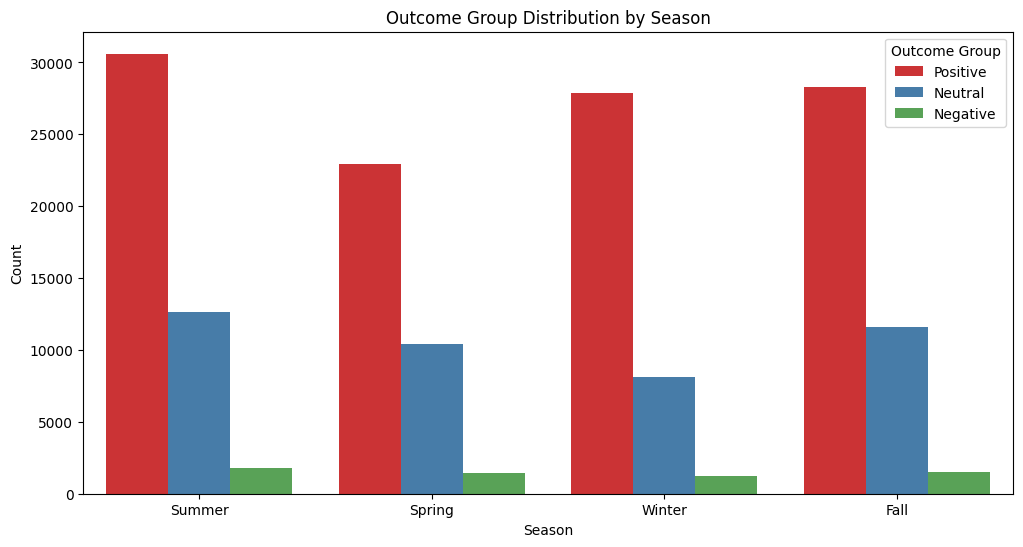

In [297]:
# Plotting Outcome Group by Season
plt.figure(figsize=(12, 6))
sns.countplot(x='outcome_season', hue='outcome_group', data=final_df, palette='Set1')
plt.title('Outcome Group Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Outcome Group')
plt.show()


## Data Preprocessing and SMOTE-ENN Pipeline

In [298]:
final_df.head()

,animal_type,outcome_group,age_days,age_group,has_name,is_fixed,breed_type,color_group,outcome_year,outcome_season
0,Cat,Positive,90.0,Puppy/Kitten,1,1,Mix,Black,2023,Summer
1,Cat,Positive,730.0,Adult,1,1,Mix,White,2019,Spring
2,Dog,Positive,365.0,Junior,1,1,Mix,White,2018,Summer
4,Dog,Positive,120.0,Puppy/Kitten,1,1,Pure,Gold,2016,Winter
5,Cat,Neutral,6.0,Puppy/Kitten,0,0,Mix,Red,2014,Spring


In [302]:
# Install necessary libraries
!pip install scikit-learn imbalanced-learn lightgbm


In [304]:
# Necessary Imports
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# For balancing classes
from collections import Counter

# Separate numerical and categorical features
numerical_features = ['age_days']
categorical_features = [
    'animal_type',
    'age_group',
    'has_name',
    'is_fixed',
    'breed_type',
    'color_group',
    'outcome_year',
    'outcome_season'
]

# Preprocessing Pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Full Pipeline including SMOTEENN
smoteenn = SMOTEENN(random_state=42)

# Full Preprocessing + SMOTEENN Pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', smoteenn)
])

# Fit and transform training data
X_train_resampled, y_train_resampled = full_pipeline.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTEENN
print("Class Distribution Before SMOTE-ENN:", Counter(y_train))
print("Class Distribution After SMOTE-ENN:", Counter(y_train_resampled))

# Transform test data
X_test_transformed = full_pipeline.named_steps['preprocessor'].transform(X_test)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Evaluate Models
for model_name, model in models.items():
    print("="*30)
    print(model_name)
    print("="*30)

    # Train model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on test data
    y_pred = model.predict(X_test_transformed)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Class Distribution Before SMOTE-ENN: Counter({2: 87741, 1: 34201, 0: 4754})
Class Distribution After SMOTE-ENN: Counter({0: 64288, 2: 51044, 1: 46167})
Logistic Regression
Accuracy: 0.6829
F1 Score: 0.7252

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.60      0.17      1188
           1       0.71      0.38      0.50      8551
           2       0.89      0.80      0.84     21936

    accuracy                           0.68     31675
   macro avg       0.57      0.60      0.50     31675
weighted avg       0.81      0.68      0.73     31675

Confusion Matrix:
 [[  717   298   173]
 [ 3186  3286  2079]
 [ 3286  1021 17629]]
Random Forest
Accuracy: 0.7382
F1 Score: 0.7544

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.35      0.21      1188
           1       0.60      0.61      0.61      8551
           2       0.88      0.81      0.84     21936

    accuracy  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10012
[LightGBM] [Info] Number of data points in the train set: 161499, number of used features: 41
[LightGBM] [Info] Start training from score -0.921126
[LightGBM] [Info] Start training from score -1.252234
[LightGBM] [Info] Start training from score -1.151811


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.7908
F1 Score: 0.7935

Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.32      0.26      1188
           1       0.68      0.63      0.66      8551
           2       0.87      0.88      0.88     21936

    accuracy                           0.79     31675
   macro avg       0.59      0.61      0.60     31675
weighted avg       0.80      0.79      0.79     31675

Confusion Matrix:
 [[  377   559   252]
 [  626  5402  2523]
 [  685  1982 19269]]
